In [ ]:
"""
a) Project Title - Criminal Recidivism Risk Analysis for Parole Decisions
b)Our data exploration focuses on whether a person will be convicted of a crime again based on his previous history.
We use the different features such as 'sex', 'age', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 
'juv_other_count', 'priors_count', 'v_decile_score'. These features help us set the models to predict each feature X. 
We train 5 separate models for sex, age, race, count, and score. Finally, we create the accuracy-fairness curve based
on our models.
c) Team member names - Meghan McGinnis, Liam Van Leynseele, David Vu, Akshit Modi

note: We drew much of our inspiration for our code/project from TheJeffLarson's github repository, 
propublica/compas-analysis. 

 
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

conn=sqlite3.connect("compas.db")
cur=conn.cursor()

df0 = pd.read_sql_query("select * from casearrest;",conn)
df1 = pd.read_sql_query("select * from charge;",conn)
df2 = pd.read_sql_query("select * from compas;",conn)
df3 = pd.read_sql_query("select * from jailhistory;",conn)
df4 = pd.read_sql_query("select * from people;",conn)
df5 = pd.read_sql_query("select * from prisonhistory;",conn)
df6 = pd.read_sql_query("select * from summary;",conn)


"""
Go through tables and manually drop columns from tables that are mainly null values
get rid of these columns so the tables data can still be used
cant use rows with null values in them
"""
    

'\nGo through tables and manually drop columns from tables that are mainly null values\nget rid of these columns so the tables data can still be used\ncant use rows with null values in them\n'

In [ ]:
###  The following section deals with cleaning the data

In [3]:
df0.dropna()
df0

,id,name,case_number,arrest_id,arrest_date,charge_degree,days_since_compas_arrest,person_id
0,1,aajah herrington,13005832CF10A,3026755,2013-04-23 00:00:00.000000,(F3),1,533
1,2,aajah herrington,13005832CF10A,3026756,2013-04-23 00:00:00.000000,(M2),1,533
2,3,aajah herrington,14007863MM10A,3144392,2014-05-13 00:00:00.000000,(M1),-384,533
3,4,aaliyah lovo,13015312CF10A,3084831,2013-11-03 00:00:00.000000,(F2),1,900
4,5,aaliyah lovo,13015312CF10A,3084832,2013-11-03 00:00:00.000000,(M1),1,900
5,6,aaron aprile,13009174CF10A,3047141,2013-06-29 00:00:00.000000,(F2),272,4474
6,7,aaron aprile,13009174CF10A,3053628,2013-07-10 00:00:00.000000,(F3),261,4474
7,8,aaron aprile,13009174CF10A,3090110,2013-11-20 00:00:00.000000,(F3),128,4474
8,9,aaron aprile,13009174CF10A,3151685,2014-06-06 00:00:00.000000,(F3),-70,4474
9,10,aaron aprile,13009174CF10A,3047142,2013-06-29 00:00:00.000000,(F3),272,4474


In [4]:
#df1 table
df1.drop(columns=['case_type'])
df1.dropna()
df1

,id,case_type,case_number,filing_date,offense_date,charge_number,charge_degree,charge,date_charge_filed,filing_type,filing_agency,name,days_since_compas,statute,person_id
0,1,,13005832CF10A,1800-01-01 00:00:00.000000,2013-04-23 00:00:00.000000,1,(F3),Driving While License Revoked,2013-04-23 00:00:00,No Information/ Transfer to Misdemeanor,Fort Lauderdale PD,aajah herrington,1,322.34(5),533
1,2,,13005832CF10A,1800-01-01 00:00:00.000000,2013-04-23 00:00:00.000000,2,(M2),Petit Theft,2013-04-23 00:00:00,Transfer to County Court,Fort Lauderdale PD,aajah herrington,1,812.014(3)(a),533
2,3,,14042370TC10A,1800-01-01 00:00:00.000000,2014-11-11 00:00:00.000000,1,(M2),Driving License Suspended,2014-11-11 00:00:00,None,Fort Lauderdale PD,aajah herrington,-566,322.34(2),533
3,4,,14007863MM10A,1800-01-01 00:00:00.000000,2014-05-13 00:00:00.000000,1,(M1),Extradition/Defendants,2014-05-13 00:00:00,Fugitive,Fort Lauderdale PD,aajah herrington,-384,941.02,533
4,5,,11065568TI30A,1800-01-01 00:00:00.000000,2011-07-03 00:00:00.000000,1,(0),Violation Of Move Over Law,2011-07-03 00:00:00,None,Broward Sheriff Office,aajah herrington,661,316.126(1)(B)1,533
5,6,,11065568TI30A,1800-01-01 00:00:00.000000,2011-07-03 00:00:00.000000,2,(0),Pers/Inj/Prot/Ins Require,2011-07-03 00:00:00,None,Broward Sheriff Office,aajah herrington,661,316.646(1),533
6,7,,12039549TI30A,1800-01-01 00:00:00.000000,2012-03-03 00:00:00.000000,1,(0),Pers/Inj/Prot/Ins Require,2012-03-03 00:00:00,None,Broward Sheriff Office,aajah herrington,417,316.646(1),533
7,8,,12039549TI30A,1800-01-01 00:00:00.000000,2012-03-03 00:00:00.000000,2,(0),License Suspended W/O Knowledge,2012-03-03 00:00:00,None,Broward Sheriff Office,aajah herrington,417,322.34(1),533
8,9,,12039549TI30A,1800-01-01 00:00:00.000000,2012-03-03 00:00:00.000000,3,(0),Expired Tag/Infraction,2012-03-03 00:00:00,None,Broward Sheriff Office,aajah herrington,417,320.07(3)(A),533
9,10,,12039549TI30A,1800-01-01 00:00:00.000000,2012-03-03 00:00:00.000000,4,(0),Disobey/Ran Stop Sign,2012-03-03 00:00:00,None,Broward Sheriff Office,aajah herrington,417,316.123(2)(A),533


In [8]:
#df2 table
df2.dropna()
df2

,id,first,last,compas_person_id,compas_case_id,compas_assessment_id,agency_text,scale_set,assessment_reason,legal_status,...,marital_status,screening_date,rec_supervision_level,rec_supervision_level_text,score_text,scale_id,type_of_assessment,raw_score,decile_score,person_id
0,1,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,7,Risk of Violence,-4.31,1,1
1,2,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,8,Risk of Recidivism,-2.78,1,1
2,3,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,18,Risk of Failure to Appear,13.00,1,1
3,4,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31 00:00:00.000000,1,Low,Low,7,Risk of Violence,-2.75,2,2
4,5,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31 00:00:00.000000,1,Low,Medium,8,Risk of Recidivism,-0.34,5,2
5,6,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31 00:00:00.000000,1,Low,Low,18,Risk of Failure to Appear,16.00,2,2
6,7,kevon,dixon,51601,52796,58102,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-01-27 00:00:00.000000,1,Low,Low,7,Risk of Violence,-3.07,1,3
7,8,kevon,dixon,51601,52796,58102,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-01-27 00:00:00.000000,1,Low,Low,8,Risk of Recidivism,-0.76,3,3
8,9,kevon,dixon,51601,52796,58102,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-01-27 00:00:00.000000,1,Low,Medium,18,Risk of Failure to Appear,25.00,6,3
9,10,ed,philo,38864,55421,61042,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-04-14 00:00:00.000000,1,Low,Low,7,Risk of Violence,-2.26,3,4


In [9]:
#df3 table
df3.dropna()
df3

,id,first,last,dob,in_custody,out_custody,person_id
0,1,victor,lozada,1951-05-12 00:00:00.000000,2013-08-05 12:41:27.000000,2013-08-13 02:27:19.000000,880
1,2,pierre,merilus,1993-03-31 00:00:00.000000,2014-11-14 12:27:25.000000,2014-11-16 03:01:50.000000,2799
2,3,diana,loubeau,1993-10-01 00:00:00.000000,2014-05-01 09:46:32.000000,2014-05-02 09:39:12.000000,486
3,4,thomas,carter,1961-01-17 00:00:00.000000,2013-05-25 05:28:09.000000,2013-05-26 08:34:54.000000,7902
4,5,travis,wright,1995-01-05 00:00:00.000000,2013-11-14 04:18:05.000000,2014-07-14 10:15:01.000000,3369
5,6,vinquisha,woodard,1993-09-01 00:00:00.000000,2013-08-08 04:05:30.000000,2013-08-27 06:00:53.000000,7278
6,7,brian,butler,1993-01-29 00:00:00.000000,2014-11-03 10:22:26.000000,2014-11-04 01:21:18.000000,2262
7,8,john,uersel,1994-09-27 00:00:00.000000,2014-01-14 04:56:31.000000,2014-02-11 05:33:24.000000,4327
8,9,gerard,restaino,1995-08-24 00:00:00.000000,2014-07-30 01:47:14.000000,2014-07-31 09:35:12.000000,7693
9,10,shawn,brown,1993-01-20 00:00:00.000000,2013-07-10 05:05:48.000000,2013-07-17 02:23:23.000000,10825


In [6]:
#df4 table
df4.drop(columns=['score_text','violent_recid','c_arrest_date','num_r_cases','r_case_number','r_charge_degree',
                'r_days_from_arrest','r_offense_date','r_charge_desc','r_jail_in','r_jail_out','num_vr_cases',
                'vr_case_number','vr_charge_degree','vr_offense_date','vr_charge_desc'])

df4.dropna()
df4

,id,name,first,last,sex,race,dob,age,age_cat,juv_fel_count,...,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc
0,1,miguel hernandez,miguel,hernandez,Male,Other,1947-04-18 00:00:00.000000,69,Greater than 45,0,...,None,None,None,None,0,None,None,None,None,None
1,2,michael ryan,michael,ryan,Male,Caucasian,1985-02-06 00:00:00.000000,31,25 - 45,0,...,None,None,None,None,0,None,None,None,None,None
2,3,kevon dixon,kevon,dixon,Male,African-American,1982-01-22 00:00:00.000000,34,25 - 45,0,...,2013-07-05 00:00:00.000000,Felony Battery (Dom Strang),None,None,1,None,13009779CF10A,(F3),2013-07-05 00:00:00.000000,Felony Battery (Dom Strang)
3,4,ed philo,ed,philo,Male,African-American,1991-05-14 00:00:00.000000,24,Less than 25,0,...,2013-06-16 00:00:00.000000,Driving Under The Influence,2013-06-16 09:05:47.000000,2013-06-16 07:18:55.000000,0,None,None,None,None,None
4,5,marcu brown,marcu,brown,Male,African-American,1993-01-21 00:00:00.000000,23,Less than 25,0,...,None,None,None,None,0,None,None,None,None,None
5,6,bouthy pierrelouis,bouthy,pierrelouis,Male,Other,1973-01-22 00:00:00.000000,43,25 - 45,0,...,None,None,None,None,0,None,None,None,None,None
6,7,marsha miles,marsha,miles,Male,Other,1971-08-22 00:00:00.000000,44,25 - 45,0,...,None,None,None,None,0,None,None,None,None,None
7,8,edward riddle,edward,riddle,Male,Caucasian,1974-07-23 00:00:00.000000,41,25 - 45,0,...,2014-03-31 00:00:00.000000,Poss of Firearm by Convic Felo,2014-03-31 08:10:09.000000,2014-04-18 04:54:59.000000,0,None,None,None,None,None
8,9,steven stewart,steven,stewart,Male,Other,1973-02-25 00:00:00.000000,43,25 - 45,0,...,None,None,None,None,0,None,None,None,None,None
9,10,elizabeth thieme,elizabeth,thieme,Female,Caucasian,1976-06-03 00:00:00.000000,39,25 - 45,0,...,None,None,None,None,0,None,None,None,None,None


In [10]:
#df5 table
df5.drop(columns=['name','middle'])
df5.dropna()
df5

,id,name,first,middle,last,dob,in_custody,out_custody,person_id
0,1,None,bilal,None,williams,1955-05-12 00:00:00.000000,1986-03-13 00:00:00.000000,1987-02-19 00:00:00.000000,4813
1,2,None,eduardo,None,cisneros,1979-08-23 00:00:00.000000,2015-02-24 00:00:00.000000,2020-01-01 00:00:00.000000,7889
2,3,None,brenley,None,johnson,1962-08-24 00:00:00.000000,2008-03-24 00:00:00.000000,2009-01-01 00:00:00.000000,9400
3,4,None,michael,None,stenquist,1980-12-30 00:00:00.000000,2015-07-02 00:00:00.000000,2015-07-08 00:00:00.000000,11598
4,5,None,andreas,None,fountain,1977-08-08 00:00:00.000000,2006-11-21 00:00:00.000000,2007-12-19 00:00:00.000000,320
5,6,None,shawanna,None,kelly,1988-03-27 00:00:00.000000,2009-05-27 00:00:00.000000,2010-03-21 00:00:00.000000,8802
6,7,None,joel,None,jasmin,1972-02-02 00:00:00.000000,2007-12-27 00:00:00.000000,2008-02-13 00:00:00.000000,2517
7,8,None,ronnie,None,brown,1968-12-02 00:00:00.000000,1986-08-04 00:00:00.000000,1987-03-10 00:00:00.000000,2327
8,9,None,velarry,None,boyd,1963-09-04 00:00:00.000000,1993-03-31 00:00:00.000000,1993-08-24 00:00:00.000000,10471
9,10,None,christopher,None,mozie,1974-09-20 00:00:00.000000,1992-01-21 00:00:00.000000,1992-03-31 00:00:00.000000,8344


In [11]:
#empty table
df6.drop
df6

,id,first,last,sex,race,dob,age,type_of_assessment,raw_score,decile_score,...,charge,in_custody,out_custody,num_days_in_jail,recidivist,days_since_compas,prior_charge,future_charge,compas_charge,person_id


In [19]:
### The following section deals with descriptive stats of df4:'People'

In [21]:
# Select columns to perform desciprtive statistics on
df4sub = df4.filter(['age', 'sex', 'age_cat', 'race', 'priors_count', 'decile_score', 'c_charge_desc' ])
df4sub.head(20)


,age,sex,age_cat,race,priors_count,decile_score,c_charge_desc
0,69,Male,Greater than 45,Other,0,1,Aggravated Assault w/Firearm
1,31,Male,25 - 45,Caucasian,0,5,None
2,34,Male,25 - 45,African-American,0,3,Felony Battery w/Prior Convict
3,24,Male,Less than 25,African-American,4,4,Possession of Cocaine
4,23,Male,Less than 25,African-American,1,8,Possession of Cannabis
5,43,Male,25 - 45,Other,2,1,arrest case no charge
6,44,Male,25 - 45,Other,0,1,Battery
7,41,Male,25 - 45,Caucasian,14,6,Possession Burglary Tools
8,43,Male,25 - 45,Other,3,4,arrest case no charge
9,39,Female,25 - 45,Caucasian,0,1,Battery


In [22]:
# print data counts
print("Race data:")
df4sub.race.value_counts()



Race data:


African-American    5813
Caucasian           4085
Hispanic            1100
Other                661
Asian                 58
Native American       40
Name: race, dtype: int64

In [23]:
# print gender counts
print("Gender data:")
df4sub.sex.value_counts()


Gender data:


Male      9336
Female    2421
Name: sex, dtype: int64

In [24]:
# print demographics counts
print("Age Groups:")
df4sub.age_cat.value_counts()

Age Groups:


25 - 45            6649
Greater than 45    2668
Less than 25       2440
Name: age_cat, dtype: int64

In [25]:
# print priors count counts
print("Prior Counts:")
df4sub.priors_count.value_counts()

Prior Counts:


0     4184
1     2199
2     1281
3      857
4      588
5      474
6      349
7      315
8      260
9      201
10     160
11     135
13     111
12     107
14      83
15      68
16      60
17      52
18      45
19      40
20      28
21      26
23      24
22      22
24      16
26      13
27      12
25      12
28       9
29       8
30       4
33       4
38       2
35       2
31       2
43       1
36       1
37       1
39       1
Name: priors_count, dtype: int64

In [26]:
# print comps score counts
df4sub.decile_score.value_counts()

 1     2577
 2     1572
 3     1259
 4     1199
 5     1034
 6      993
 7      900
 9      802
 8      796
 10     610
-1       15
Name: decile_score, dtype: int64

In [45]:
# print charge category counts
df4sub.c_charge_desc.value_counts()

arrest case no charge                1858
Battery                              1811
Possession of Cocaine                 703
Grand Theft in the 3rd Degree         688
Driving While License Revoked         255
Driving Under The Influence           217
Felony Battery (Dom Strang)           174
Felony Driving While Lic Suspd        159
Grand Theft (Motor Vehicle)           139
Burglary Unoccupied Dwelling          132
Pos Cannabis W/Intent Sel/Del         131
Possess Cannabis/20 Grams Or Less     127
Burglary Conveyance Unoccup           124
Aggravated Assault W/Dead Weap        124
DUI Property Damage/Injury            111
Possession of Cannabis                109
Aggrav Battery w/Deadly Weapon        101
Felony Petit Theft                     98
DUI Level 0.15 Or Minor In Veh         93
Driving License Suspended              92
Uttering a Forged Instrument           91
Resist Officer w/Violence              90
Battery on Law Enforc Officer          83
Poss3,4 Methylenedioxymethcath    

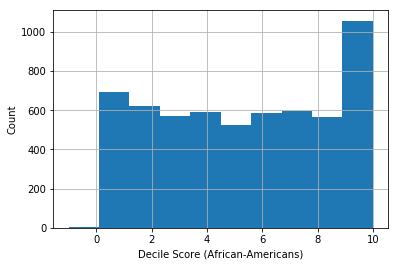

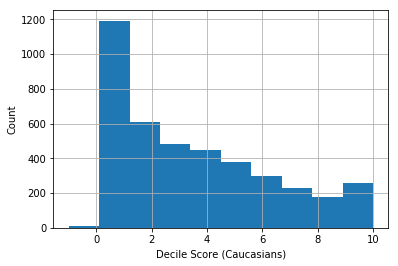

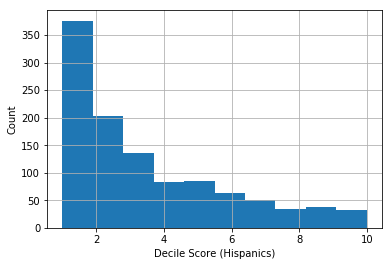

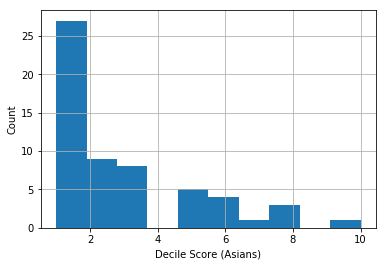

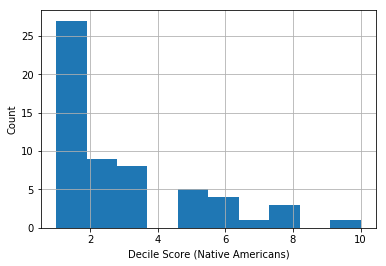

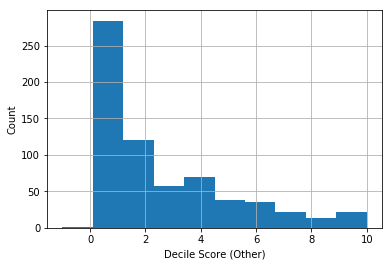

In [29]:
# *Note: Decile scores are Compas scores converted to a 1-10 scale. 
#  The higher the decile score, the more likely conviction will happen.

# plot decile score for African-Americans
black_deciles = df4sub[df4sub.race == 'African-American']
plt.hist(black_deciles['decile_score'])
plt.xlabel("Decile Score (African-Americans)")
plt.ylabel("Count")
plt.grid(True)
plt.ylim(ymin=0)  
plt.show()

# plot decile score for Caucasians
white_deciles = df4sub[df4sub.race == 'Caucasian']
plt.hist(white_deciles['decile_score'])
plt.xlabel("Decile Score (Caucasians)")
plt.ylabel("Count")
plt.grid(True)
plt.ylim(ymin=0)  
plt.show()

# plot decile score for Hispanics
hispanic_deciles = df4sub[df4sub.race == 'Hispanic']
plt.hist(hispanic_deciles['decile_score'])
plt.xlabel("Decile Score (Hispanics)")
plt.ylabel("Count")
plt.grid(True)
plt.ylim(ymin=0)  
plt.show()

# plot decile score for Asians
asian_deciles = df4sub[df4sub.race == 'Asian']
plt.hist(asian_deciles['decile_score'])
plt.xlabel("Decile Score (Asians)")
plt.ylabel("Count")
plt.grid(True)
plt.ylim(ymin=0)  
plt.show()

# plot decile score for Native Americans
native_deciles = df4sub[df4sub.race == 'Native American']
plt.hist(asian_deciles['decile_score'])
plt.xlabel("Decile Score (Native Americans)")
plt.ylabel("Count")
plt.grid(True)
plt.ylim(ymin=0)  
plt.show()

# plot decile score for Other
other_deciles = df4sub[df4sub.race == 'Other']
plt.hist(other_deciles['decile_score'])
plt.xlabel("Decile Score (Other)")
plt.ylabel("Count")
plt.grid(True)
plt.ylim(ymin=0)  
plt.show()

In [ ]:
### The Following Section Deals Modeling Fairness within the Data 

In [37]:
from themis_ml.metrics import mean_difference

compas = pd.read_csv("compas-scores-two-years.csv")
compas.dropna()

two_year_recid = compas["two_year_recid"]
two_year_recid.value_counts()

0    3963
1    3251
Name: two_year_recid, dtype: int64

In [38]:
# give qualitative columns numeric values for sex and race


# sex values: 0 = male, 1 = female
compas['sex'].replace('Male', 0, inplace=True)
compas['sex'].replace('Female', 1, inplace=True)

# race values: creating a binary model with 
# African-Americans = 0, all other races = 1
compas['race'].replace('African-American', 0, inplace = True)
compas['race'].replace('Caucasian', 1, inplace = True)
compas['race'].replace('Hispanic', 1, inplace = True)
compas['race'].replace('Asian', 1, inplace = True)
compas['race'].replace('Native American', 1, inplace = True)
compas['race'].replace('Other', 1, inplace = True)


# decile scores: Low decile (0-4) = 0, High decile score (5-10)= 1
for x in compas['decile_score']:
    if x <= 4:
        compas['decile_score'].replace(x, 0, inplace = True)
    else:
        compas['decile_score'].replace(x, 1, inplace = True)

# prior counts: No prior counts = 0, any prior counts = 1
for x in compas['priors_count']:
    if x != 0:
        compas['priors_count'].replace(x, 1, inplace = True)
        
        
# age: Less than 35 = 0, over 35 = 1
for x in compas['age']:
    if x <= 35:
        compas['age'].replace(x, 0, inplace = True)
    else:
        compas['age'].replace(x, 1, inplace = True)


In [47]:
from sklearn.model_selection import train_test_split

training_data = compas

# Defining feature set
features = ['sex', 'age', 'race', 'juv_fel_count','decile_score','juv_misd_count',
            'juv_other_count', 'priors_count', 'v_decile_score']

# Removing variables related to sex
features_no_sex = [f for f in features if f != 'sex']

# Removing variables related to race
features_no_race = [f for f in features if f != 'race']

# Removing variables related to age
features_no_age = [f for f in features if f != 'age']
    

# Removing variables related to counts
features_no_count = [f for f in features if f not in [
    'juv_fel_count',
    'juv_misd_count',
    'juv_other_count',
    'priors_count']
                ]

# Removing variables related to scores
features_no_score = [f for f in features if f not in [
    'v_decile_score',
    'decile_score']
                     ]
                     
# setting up data to train linear models to predict each feature X
X = training_data[features].values
X_no_sex = training_data[features_no_sex].values
X_no_race = training_data[features_no_race].values
X_no_age = training_data[features_no_age].values
X_no_count = training_data[features_no_count].values
X_no_score = training_data[features_no_score].values

y = compas["two_year_recid"].values

# using s as input

s_sex = compas.sex.values
s_age = compas.age.values
s_race = compas.race.values
s_count = compas.priors_count.values
s_score = compas.decile_score.values


[0 0 0 ... 0 0 0]


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.base import clone

from themis_ml.postprocessing.reject_option_classification import SingleROClassifier
from themis_ml.linear_model import LinearACFClassifier

In [41]:
# training the models
#"mean_diff_age", "mean_diff_count", "mean_diff_score
# "auc_age","auc_count", "auc_score"
METRICS_COLUMNS = [
    "mean_diff_sex", "mean_diff_race", "auc_sex", "auc_race" 
]

# run the experiment on a particular set of train and test indices
def run_experiment_iteration(
        X, X_no_sex, X_no_race, y,
        s_sex, s_race, train, test):
    
    metrics = []
    
    # define the model
    logistic_clf = LogisticRegression(penalty="l2", C=0.001, class_weight="balanced")
    baseline_clf = logistic_clf
    rpa_clf = logistic_clf
    roc_clf = SingleROClassifier(estimator=logistic_clf)
    acf_clf = LinearACFClassifier(
        target_estimator=logistic_clf,
        binary_residual_type="absolute")
    
    # train baseline model
    baseline_clf.fit(X[train], y[train])
    baseline_preds = baseline_clf.predict(X[test])
    baseline_auc = roc_auc_score(y[test], baseline_preds)
    metrics.append([
        "B",
        mean_difference(baseline_preds, s_sex[test])[0],
        mean_difference(baseline_preds, s_race[test])[0],
        baseline_auc, baseline_auc              
    ])
    
    # train "remove protected attributes" model

    # model trained with no explicitly sex-related variables
    rpa_preds_no_sex = rpa_clf.fit(
        X_no_sex[train], y[train]).predict(X_no_sex[test])
 
    rpa_preds_no_race = rpa_clf.fit(
        X_no_race[train], y[train]).predict(X_no_race[test])

    metrics.append([
        "RPA",
        mean_difference(rpa_preds_no_sex, s_sex[test])[0],
        mean_difference(rpa_preds_no_race, s_race[test])[0],
        roc_auc_score(y[test], rpa_preds_no_sex),
        roc_auc_score(y[test], rpa_preds_no_race)
    ])

    # train reject-option classification model.
    roc_clf.fit(X[train], y[train])
    roc_preds_sex = roc_clf.predict(X[test], s_sex[test])
    roc_preds_race = roc_clf.predict(X[test], s_race[test])
    metrics.append([
        "ROC",
        mean_difference(roc_preds_sex, s_sex[test])[0],
        mean_difference(roc_preds_race, s_race[test])[0],
        roc_auc_score(y[test], roc_preds_sex),
        roc_auc_score(y[test], roc_preds_race),
    ])

    # train additive counterfactually fair model.
    acf_preds_sex = acf_clf.fit(
        X[train], y[train], s_sex[train]).predict(X[test], s_sex[test])
    acf_preds_race = acf_clf.fit(
        X[train], y[train], s_race[train]).predict(X[test], s_race[test])
    metrics.append([
        "ACF",
        mean_difference(acf_preds_sex, s_sex[test])[0],
        mean_difference(acf_preds_race, s_race[test])[0],
        roc_auc_score(y[test], acf_preds_sex),
        roc_auc_score(y[test], acf_preds_race)
    ])

    # convert metrics list of lists into dataframe
    return pd.DataFrame(
        metrics, columns=["condition"] + METRICS_COLUMNS)

In [13]:
N_SPLITS = 5
N_REPEATS = 20

# add binary variables so that we can stratify the observations
# by protected class
groups = np.add(s_sex, s_race)

# do 5-fold, 10x repeating cross validation so that we quantify the
# uncertainty around our metrics estimates.
cv = RepeatedStratifiedKFold(
    n_splits=N_SPLITS, n_repeats=N_REPEATS, random_state=41)

metrics = []
print("Running cross-validation experiment.  Please wait")
for i, (train_idx, test_idx) in enumerate(cv.split(X, y, groups=groups)):
    metrics.append(
        run_experiment_iteration(
            X, X_no_sex, X_no_race, y, s_race, s_sex, train_idx, test_idx)
        .assign(rep_fold=i))

# concatenate metrics from all cv-folds
metrics = pd.concat(metrics)

# compute mean point estimate for each metric and each condition
group_df = metrics.groupby("condition")
mean_metrics = (group_df[METRICS_COLUMNS].mean())

# compute standard error of the mean
stderr_metrics = (group_df[METRICS_COLUMNS].std()) / np.sqrt(N_REPEATS * N_SPLITS)

Running cross-validation experiment.  Please wait


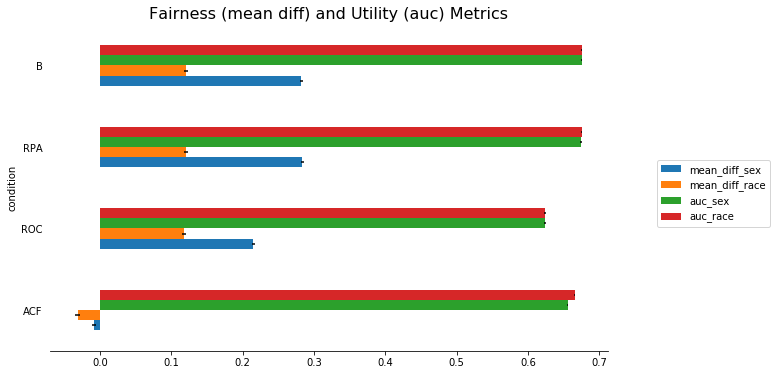

In [42]:
# plot vertical bar chart
ax = mean_metrics.loc[reversed(["B", "RPA", "ROC", "ACF"])].plot(
kind="barh", figsize=(10, 6),
xerr=stderr_metrics.loc[reversed(["B", "RPA", "ROC", "ACF"])],
legend=False);
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.6))
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', which='both', left='off')
ax.set_title(
"Fairness (mean diff) and Utility (auc) Metrics", fontsize=16);

In [43]:
mean_metrics.loc[["B", "RPA", "ROC", "ACF"]].rename(
    columns=lambda x: "mean(%s)" % x)

,mean(mean_diff_sex),mean(mean_diff_race),mean(auc_sex),mean(auc_race)
condition,,,,
B,0.282188,0.120241,0.675425,0.675425
RPA,0.283455,0.119961,0.674276,0.675429
ROC,0.215045,0.117763,0.624289,0.624289
ACF,-0.008884,-0.031551,0.655983,0.665741
